In [1]:
import baccoemu
import chainconsumer
import emcee
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import plot_utils
import plotter
import utils
import run_inference as rinf
import moment_network as mn

%load_ext autoreload
%autoreload 2

2024-03-18 18:37:06.494982: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
%matplotlib inline
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

font, rcnew = plot_utils.matplotlib_default_config()
mpl.rc('font', **font)
mpl.pyplot.rcParams.update(rcnew)
mpl.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

In [3]:
tag_fit = '_cosmolib_err1p_kmax0.1'

In [4]:
param_names_all = ['omega_cold', 'sigma_8', 'h', 'omega_baryon', 'n_s', 'seed']
param_names = ['omega_cold', 'sigma_8', 'h']
param_names_fixed = [name for name in param_names_all if name not in param_names]
idxs_param_names = [param_names_all.index(name) for name in param_names]

tag_pk = '_b1000'
dir_pks = f'../data/pks_cosmolib/pks{tag_pk}'

bias_params = np.loadtxt(f'{dir_pks}/bias_params.txt')

n_lib = 500
dir_mocks = '../data/cosmolib'
theta = []
Pk = []
Pk_lin = []
Pk_nl = []
gaussian_error_pk = []
param_dict_fixed = {}
for idx_LH in range(n_lib):
    fn_fields = f'{dir_mocks}/LH{idx_LH}/Eulerian_fields_lr_{idx_LH}.npy'
    fn_params = f'{dir_mocks}/LH{idx_LH}/cosmo_{idx_LH}.txt'
    fn_pk = f'{dir_pks}/pk_{idx_LH}.npy'
    
    pk_obj = np.load(fn_pk, allow_pickle=True).item()
    Pk.append(pk_obj['pk'])
    Pk_lin.append(pk_obj['pk_theory_lin'])
    Pk_nl.append(pk_obj['pk_theory_nl'])
    gaussian_error_pk.append(pk_obj['pk_gaussian_error'])
    
    param_vals = np.loadtxt(fn_params)
    if idx_LH==0:
        for name in param_names_fixed:
            param_dict_fixed[name] = param_vals[param_names_all.index(name)]
    theta.append(param_vals[idxs_param_names])

Pk = np.array(Pk)
Pk_lin = np.array(Pk_lin)
Pk_nl = np.array(Pk_nl)
theta = np.array(theta)
gaussian_error_pk = np.array(gaussian_error_pk)

kk = pk_obj['k'] # all ks should be same so just grab one

In [9]:
pk_obj['pk_theory_lin'], pk_obj['pk_theory_nl']

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

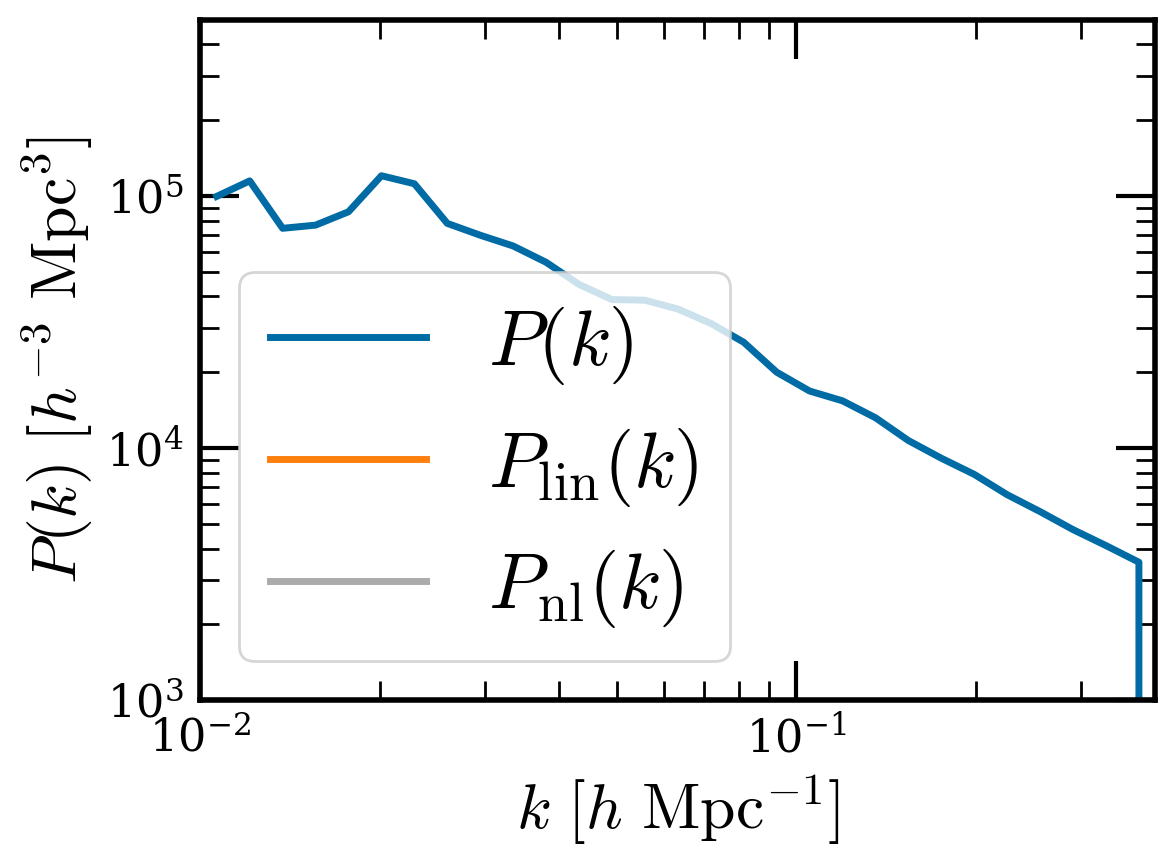

In [7]:
fig, ax = mpl.pyplot.subplots(figsize=(6, 4.5))
n_plot = 1
for iLH in range(n_plot):
    ax.loglog(kk, Pk[iLH], label=r'$P(k)$')
    ax.loglog(kk, Pk_lin[iLH], label=r'$P_\text{lin}(k)$')
    ax.loglog(kk, Pk_nl[iLH], label=r'$P_\text{nl}(k)$')

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=23)

ax.set_xlim(1e-2, 0.4)
ax.set_ylim(1e3, 5e5)

plt.legend()

mpl.pyplot.tight_layout()
mpl.pyplot.show()